<a href="https://colab.research.google.com/github/kesterlyn-wilson/applied-bioinformatics/blob/main/KBA_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set venv
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from umap import UMAP
import matplotlib.pyplot as plt

# Load model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Load knowledge base data
kbas = pd.read_csv('/content/report1756070252456.csv', encoding='latin1') #CHANGE

In [ ]:
# 1. Drop duplicates DONT NEED
kbas_cleaned = kbas.drop_duplicates(subset=['Article Number']).reset_index(drop=True)

In [ ]:
# 2. Combined text
kba_texts = (
    kbas['Title'].fillna('') + '' +
    kbas['Summary'].fillna('') + '' +
    kbas['Answer'].fillna('') + '' +
    kbas['Failure Type'].fillna('').tolist()
)

# 3. Embed
kba_vecs = model.encode(kba_texts)

# 4. UMAP
reducer = UMAP(n_neighbors=10, min_dist=0.3, metric='cosine')
kba_2d = reducer.fit_transform(kba_vecs)

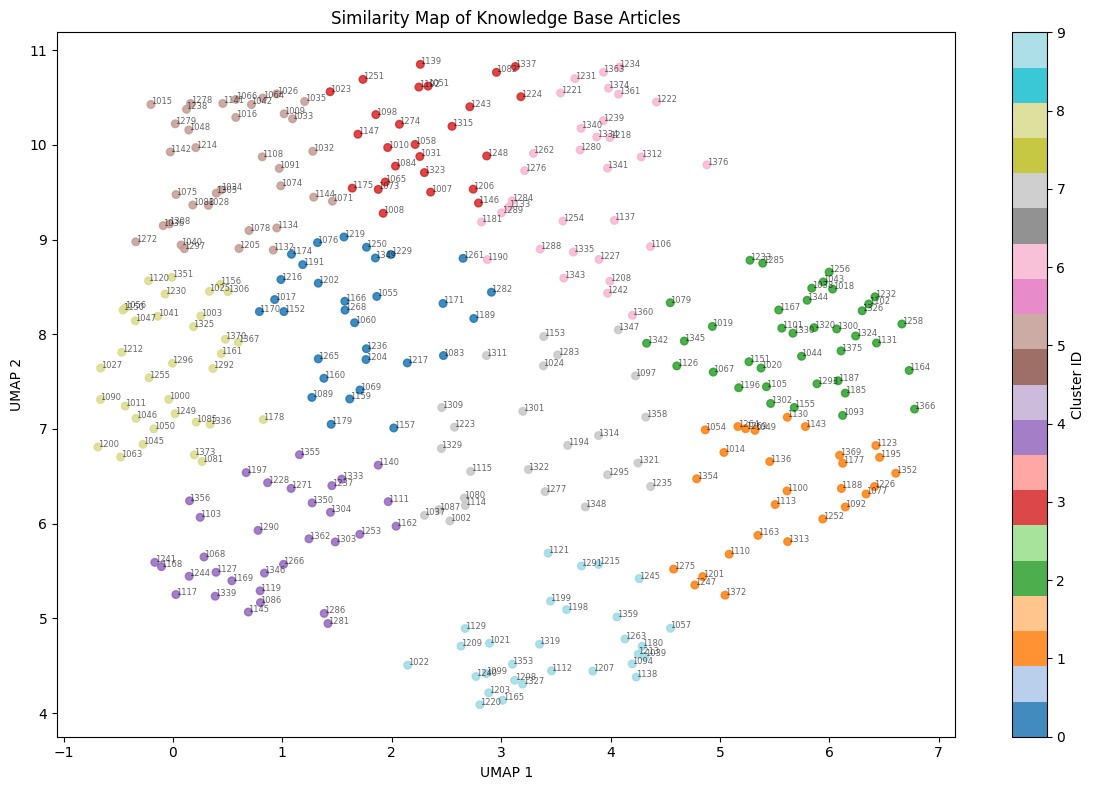

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = 10  # tweak (8–15 is common)
km = KMeans(n_clusters=k, n_init='auto', random_state=42)
cluster = km.fit_predict(kba_2d)

plt.figure(figsize=(12,8))
sc = plt.scatter(kba_2d[:,0], kba_2d[:,1], c=cluster, cmap='tab20', alpha=0.85, s=30)
plt.colorbar(sc, label='Cluster ID')

# Make Pretty
for i, title in enumerate(kbas['Article Number']):
    plt.text(kba_2d[i, 0], kba_2d[i, 1], str(title)[:30], fontsize=6, alpha=0.6)

plt.title("Similarity Map of Knowledge Base Articles")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.tight_layout()
plt.show()

In [ ]:
# To generate an interactive map (zoom in and out as needed)
import plotly.express as px
fig = px.scatter(
    x=kba_2d[:, 0],
    y=kba_2d[:, 1],
    text=kbas['Article Number'],
    title="Semantic Map of Knowledge Base Articles",
)
fig.update_traces(marker=dict(size=6), selector=dict(mode='markers'))
fig.update_layout(height=800, width=1000)

fig.show()
